<a href="https://colab.research.google.com/github/As-gonsolin/Convolutional_Neural_Network_Assignment/blob/master/CNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#CNN Tensorflow Assignment
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


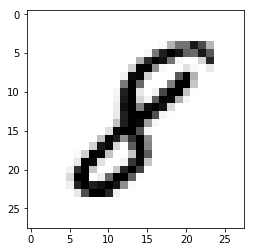

In [4]:
import matplotlib.pyplot as plt
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0827 01:51:21.416432 139948646164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 01:51:21.448300 139948646164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 01:51:21.454924 139948646164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 01:51:21.495600 139948646164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 01:51:21.528634 1399486

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0827 01:51:39.601743 139948646164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 01:51:39.630302 139948646164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 01:51:39.746327 139948646164352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.2053 - acc: 0.9383
Epoch 2/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.0811 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.0547 - acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.0410 - acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 36s 605us/step - loss: 0.0341 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0275 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0236 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 36s 599us/step - loss: 0.0217 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.0189 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 37s 609us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 168us/step


[0.061949126996448105, 0.9831]